In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

import sys, os, warnings
warnings.filterwarnings("ignore")
sys.path.append(os.path.abspath(os.path.join('../src')))

import pandas as pd
from IPython.display import display
from utils import set_seed
from churn.eval import evaluate_model, set_eval_theme, get_feature_importance

SEED = 42
set_seed(SEED)
set_eval_theme()

In [97]:
MODEL_PATH = r"C:\Users\PC\OneDrive\Documents\uni\AI7101-Project\models"
VAL_CSV = r"C:\Users\PC\OneDrive\Documents\uni\AI7101-Project\data\processed\val_processed.csv"
TEST_CSV = r"C:\Users\PC\OneDrive\Documents\uni\AI7101-Project\data\processed\test_processed.csv"
TARGET = "CHURN"

In [98]:
val_df = pd.read_csv(VAL_CSV)
test_df = pd.read_csv(TEST_CSV)

X_val, y_val = val_df.drop(columns=["CHURN"]), val_df[TARGET].astype(int)
X_test, y_test = test_df.drop(columns=["CHURN"]), test_df[TARGET].astype(int)

## Logistic Regression

In [ ]:
model_path = r"C:\path\to\logistic_regression_model.joblib"
res_lr = evaluate_model(model_path, X_val, y_val, X_test, y_test, threshold="f1")

print(f"Threshold: {res_lr['threshold']:.3f}\n")
print("Validation Metrics:")
for k, v in res_lr["val_metrics"].items():
    if isinstance(v, float):
        print(f"  {k:>12}: {v:.4f}")

print("\nTest Metrics:")
for k, v in res_lr["test_metrics"].items():
    if isinstance(v, float):
        print(f"  {k:>12}: {v:.4f}")

print("\n--- Classification Report (Validation) ---")
print(res_lr["val_report"])

print("\n--- Classification Report (Test) ---")
print(res_lr["test_report"])

if res_lr["importances"] is not None:
    imp_lr = get_feature_importance(res_lr["model"], res_lr["features"], plot=True, top=20)

## Random Forest

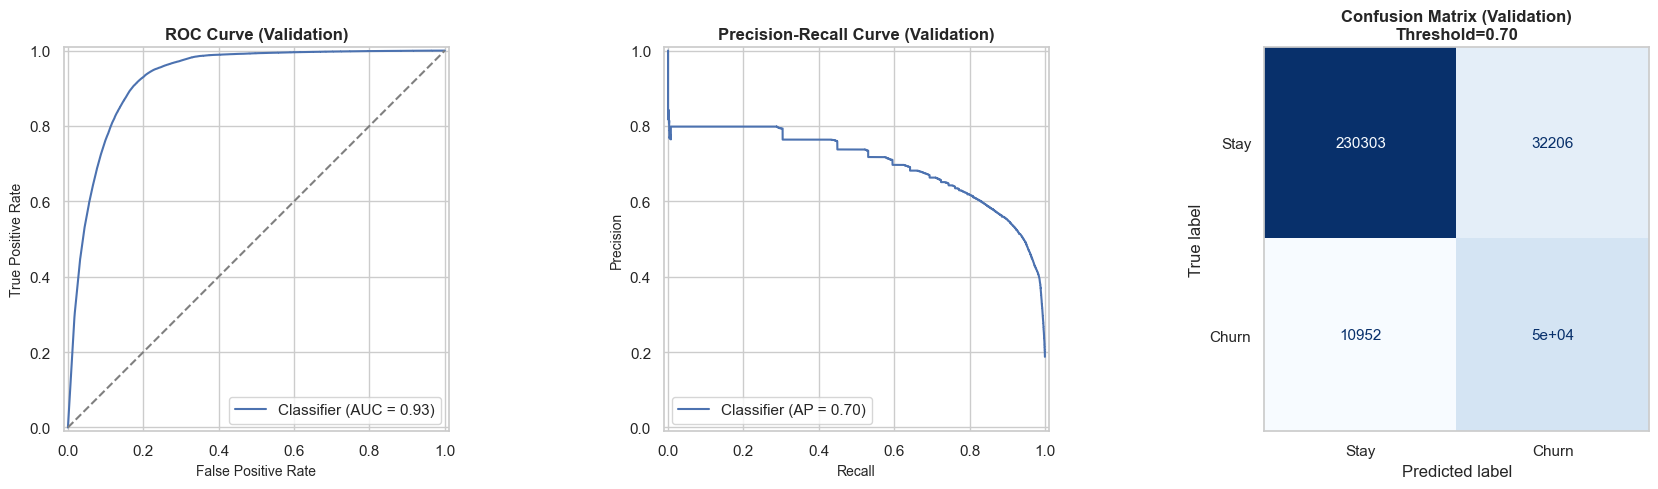

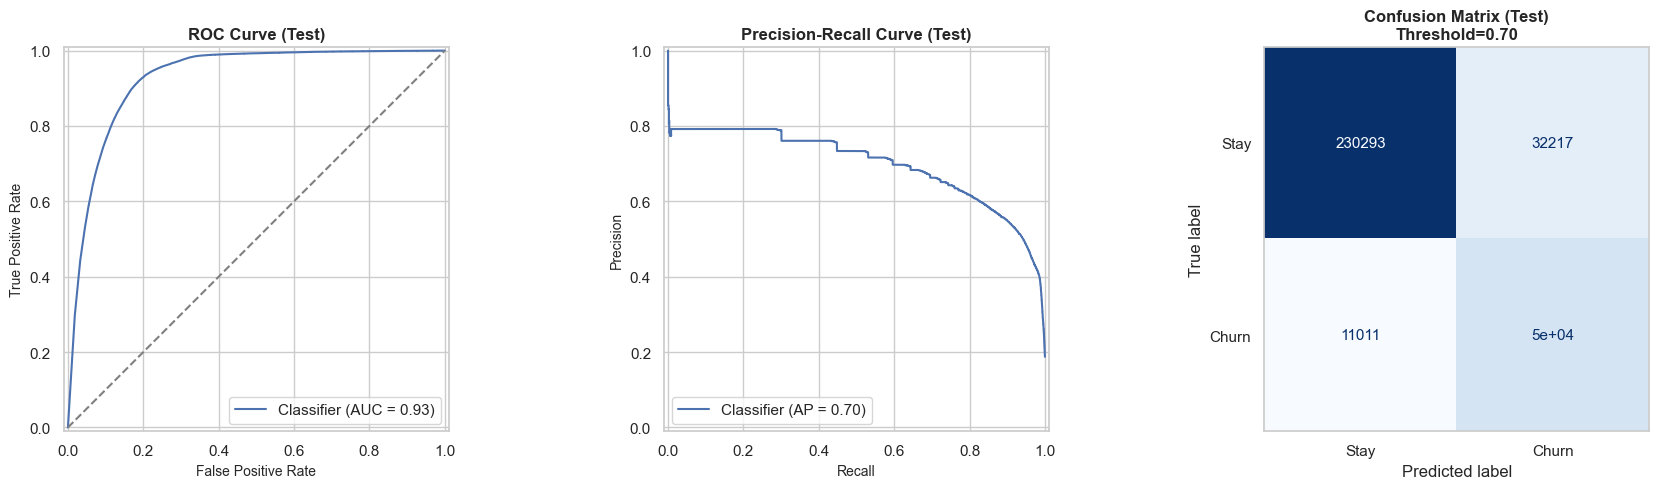

Threshold: 0.700

Validation Metrics:
       roc_auc: 0.9290
        pr_auc: 0.7009
     precision: 0.6065
        recall: 0.8193
            f1: 0.6970
     threshold: 0.7000

Test Metrics:
       roc_auc: 0.9286
        pr_auc: 0.6980
     precision: 0.6062
        recall: 0.8183
            f1: 0.6964
     threshold: 0.7000

--- Classification Report (Validation) ---
              precision    recall  f1-score   support

           0       0.95      0.88      0.91    262509
           1       0.61      0.82      0.70     60598

    accuracy                           0.87    323107
   macro avg       0.78      0.85      0.81    323107
weighted avg       0.89      0.87      0.87    323107


--- Classification Report (Test) ---
              precision    recall  f1-score   support

           0       0.95      0.88      0.91    262510
           1       0.61      0.82      0.70     60598

    accuracy                           0.87    323108
   macro avg       0.78      0.85      0.81 

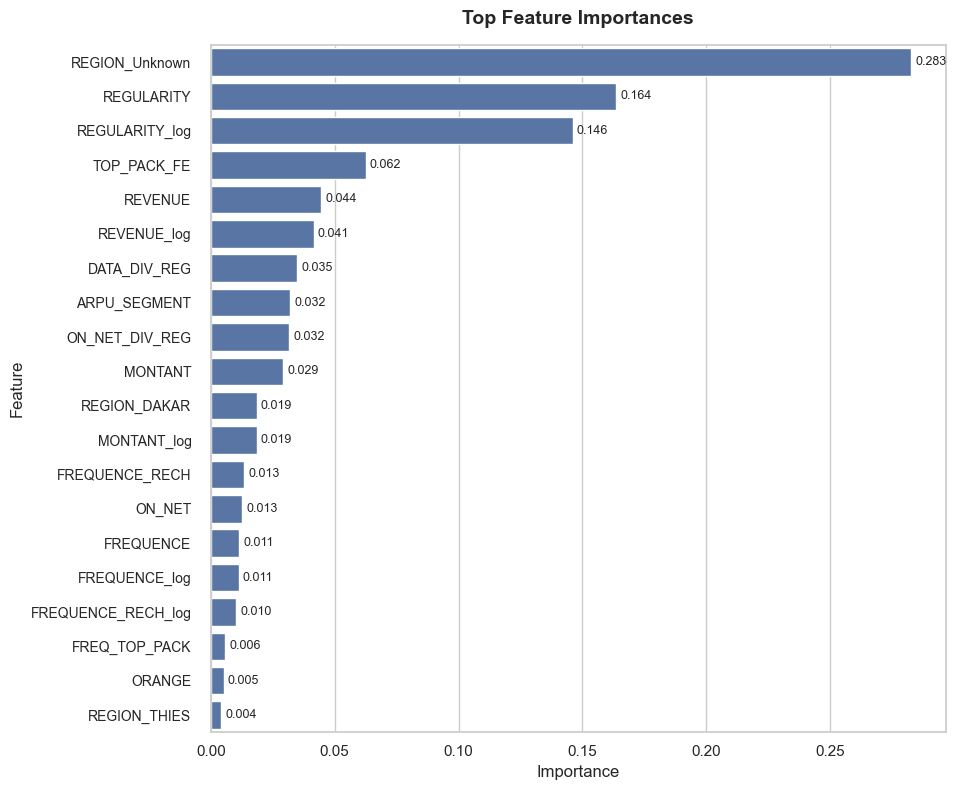

In [99]:
model_path = r"C:\Users\PC\OneDrive\Documents\uni\AI7101-Project\models\random_forest_model.joblib"
res_rf = evaluate_model(model_path, X_val, y_val, X_test, y_test, threshold="f1")

print(f"Threshold: {res_rf['threshold']:.3f}\n")
print("Validation Metrics:")
for k, v in res_rf["val_metrics"].items():
    if isinstance(v, float):
        print(f"  {k:>12}: {v:.4f}")

print("\nTest Metrics:")
for k, v in res_rf["test_metrics"].items():
    if isinstance(v, float):
        print(f"  {k:>12}: {v:.4f}")

print("\n--- Classification Report (Validation) ---")
print(res_rf["val_report"])

print("\n--- Classification Report (Test) ---")
print(res_rf["test_report"])

# feature importance graph
if res_rf["importances"] is not None:
    imp_rf = get_feature_importance(res_rf["model"], res_rf["features"], plot=True, top=20)

## Gradient Boosting

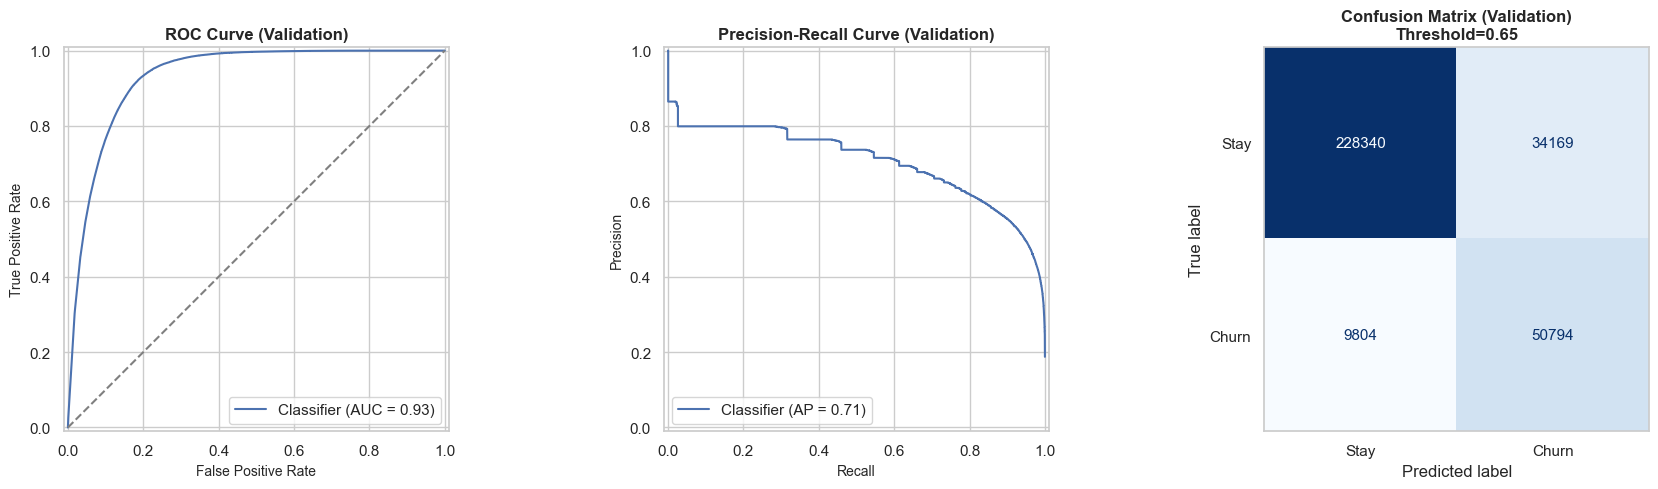

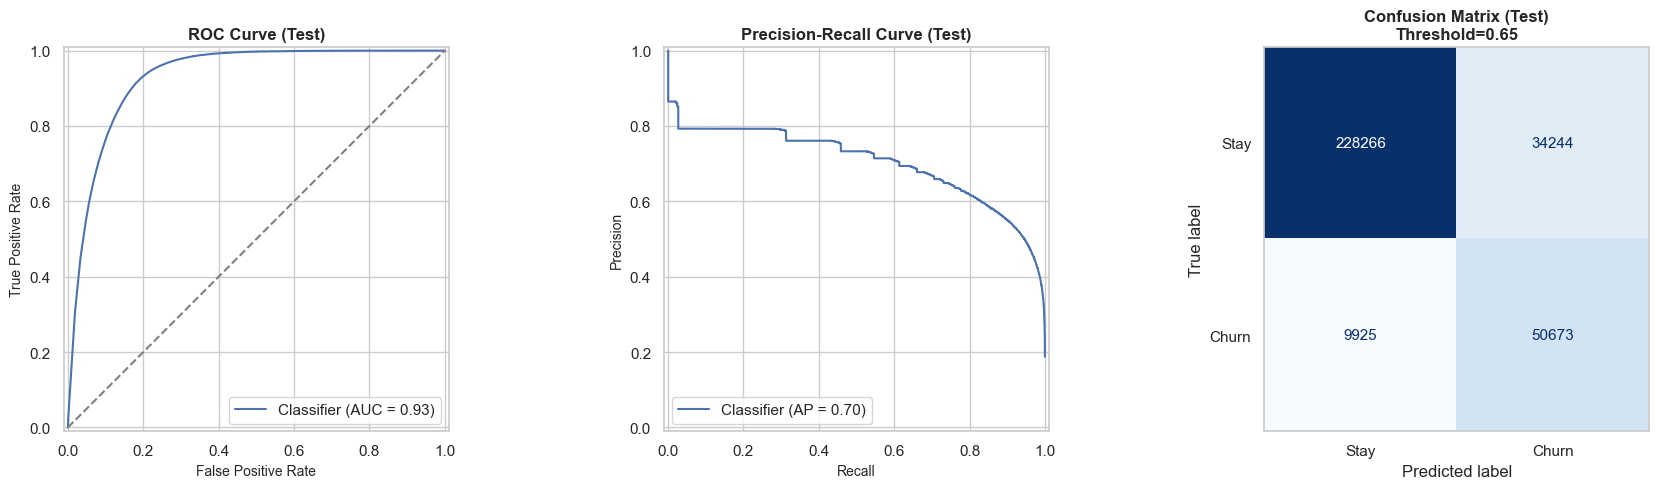

Threshold: 0.650

Validation Metrics:
       roc_auc: 0.9316
        pr_auc: 0.7058
     precision: 0.5978
        recall: 0.8382
            f1: 0.6979
     threshold: 0.6500

Test Metrics:
       roc_auc: 0.9311
        pr_auc: 0.7026
     precision: 0.5967
        recall: 0.8362
            f1: 0.6965
     threshold: 0.6500

--- Classification Report (Validation) ---
              precision    recall  f1-score   support

           0       0.96      0.87      0.91    262509
           1       0.60      0.84      0.70     60598

    accuracy                           0.86    323107
   macro avg       0.78      0.85      0.81    323107
weighted avg       0.89      0.86      0.87    323107


--- Classification Report (Test) ---
              precision    recall  f1-score   support

           0       0.96      0.87      0.91    262510
           1       0.60      0.84      0.70     60598

    accuracy                           0.86    323108
   macro avg       0.78      0.85      0.80 

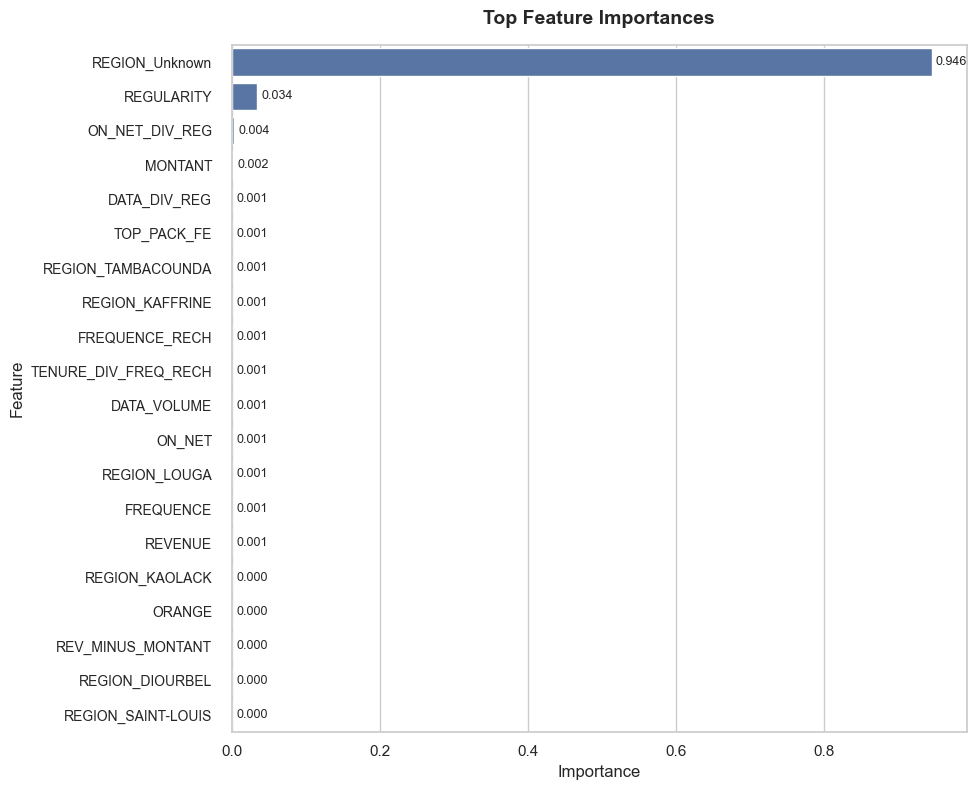

In [100]:
model_path = r"C:\Users\PC\OneDrive\Documents\uni\AI7101-Project\models\xgboost_model.joblib"
res_gb = evaluate_model(model_path, X_val, y_val, X_test, y_test, threshold="f1")

print(f"Threshold: {res_gb['threshold']:.3f}\n")
print("Validation Metrics:")
for k, v in res_gb["val_metrics"].items():
    if isinstance(v, float):
        print(f"  {k:>12}: {v:.4f}")

print("\nTest Metrics:")
for k, v in res_gb["test_metrics"].items():
    if isinstance(v, float):
        print(f"  {k:>12}: {v:.4f}")

print("\n--- Classification Report (Validation) ---")
print(res_gb["val_report"])

print("\n--- Classification Report (Test) ---")
print(res_gb["test_report"])

# Feature importance
if res_gb["importances"] is not None:
    imp_gb = get_feature_importance(res_gb["model"], res_gb["features"], plot=True, top=20)

## Final Comparison table

In [101]:
all_results = {
    "Logistic Regression": res_lr,
    "Random Forest": res_rf,
    "Gradient Boosting": res_gb
}

rows = []
for name, res in all_results.items():
    vm = res["val_metrics"]
    tm = res["test_metrics"]
    rows.append({
        "Model": name,
        "Val ROC AUC": vm["roc_auc"],
        "Test ROC AUC": tm["roc_auc"],
        "Val PR AUC": vm["pr_auc"],
        "Test PR AUC": tm["pr_auc"],
        "Val F1": vm["f1"],
        "Test F1": tm["f1"],
        "Threshold": res["threshold"],
    })

summary = pd.DataFrame(rows).sort_values("Test ROC AUC", ascending=False)
display(summary)

,Model,Val ROC AUC,Test ROC AUC,Val PR AUC,Test PR AUC,Val F1,Test F1,Threshold
2,Gradient Boosting,0.931556,0.931061,0.705766,0.702556,0.697907,0.696464,0.65
1,Random Forest,0.928968,0.928601,0.700879,0.697988,0.697031,0.696437,0.70
0,Logistic Regression,0.502570,0.502512,0.188335,0.188316,0.316648,0.316640,0.95


## Save Figures

In [ ]:
outdir = r"..\figs"
os.makedirs(outdir, exist_ok=True)

for name, res in all_results.items():
    for tag, fig in res["figures"].items():
        fig.savefig(os.path.join(outdir, f"{name.replace(' ','_')}_{tag}.png"))

print(f"Figures saved to: {outdir}")